# ANSHU YADAV
# DATA SCIENCE AND BUSINESS ANALYST INTERN AT THE SPARK FOUNDATION

## Creating a Decision Tree Classifier and Visualizing it on a Iris Dataset

## Impoting the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the Dataset

In [2]:
dataset = pd.read_csv('Iris.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values


In [3]:
# Define feature names (assuming the first column is an index or ID)
feature_names = dataset.columns[1:-1]

In [4]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
#Checking For Missing Values
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## label encoding on a Target Values

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Splitting the Dataset into Training and Test Set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 0 )


## Training the Decision Tree Classification model on the Training set

In [10]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Predicting the Test Set Results

In [11]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


## Making the confusion matrix

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


1.0

## Applying k-Fold Cross Validation

In [20]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 93.33 %
Standard Deviation: 3.33 %


## let us visualize the Decision Tree Classifier Model to understand it better.

In [13]:
# Import necessary libraries for graph viz
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

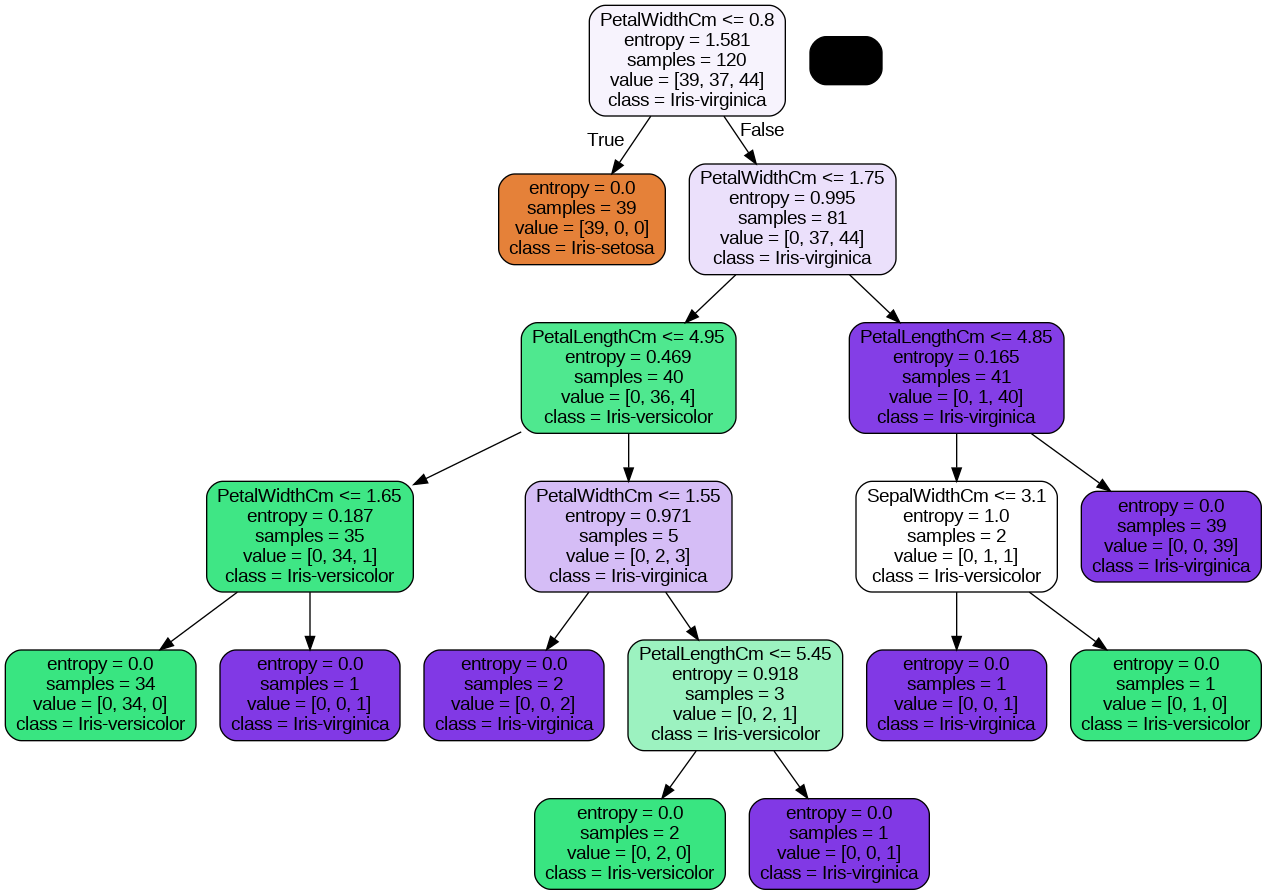

In [14]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True,
                feature_names=feature_names, class_names=le.classes_)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Predicting New Result

In [15]:
y_pred = classifier.predict([[5.1,3.5,1.4,0.2]])
if y_pred == 0:
    print("Flower is Setosa")
elif y_pred == 1:
    print("Flower is Versicolor")
else:
    print("Flower is Virginica")


Flower is Setosa


In [16]:
y_pred = classifier.predict([[5.7,2.5,5,2]])
if y_pred == 0:
    print("Flower is Setosa")
elif y_pred == 1:
    print("Flower is Versicolor")
else:
    print("Flower is Virginica")

Flower is Virginica
